## Maximum Hydaulic Conductance in Aboveground Stem Compartments - FATES-Hydro

Here we review and evaluate the functions that calculate maximum hydraulic conductance $K_{max(i)}$ of any stem compartment indexed $i$ in the plant.  The compartments can vary in depth and elevation over the height of a plant.  This is an evaluation of the formulation as per TFS and FATES-Hydro (Christoffersen et al. 2017), which uses concepts from Savage et al. 2010.


The process is as follows:

Calculate maximum conductance from the top of the tree to both the bottom of the compartment $K^{-}_{max}$ , and the top of the compartment $K^{+}_{max}$.  Stem compartments are aligned in series, so the the conductance over the compartment follows resister theory:

$$ K_{max} = \left( \frac{1}{K^{-}_{max}} - \frac{1}{K^{+}_{max}} \right)^{-1} $$

The maximum conductance from the top of the plant to the  top and bottom of the compartments is derived from a maximum conductance that assumes no tapering effects of the xylems $\tilde{K}_{max}$, and then modifies that result by a scaling function $\chi$ to incorporate the tapering effects, based on work by Savage et al. 2010. The max conductance to the lower edge of the compartment:

$$ K^{-}_{max} = \tilde{K}^{-}_{max} \cdot \chi^{-} $$

And the upper edge of the compartment:

$$ K^{+}_{max} = \tilde{K}^{+}_{max} \cdot \chi^{+} $$

The calculation of the untapered maximum conductances are straight forward, using a 1 dimensional flow geometry in Darcy flow framework, based on the material maximum conductivity of the xylems $k_{max}$, the mean cross section of flow (sapwood) $a_{sap}$ and the path length of flow. In FATES-Hydro, we use a simplifying assumption that the cross sectional area is uniform over the depth of the plant ($a^-_{sap} = a^+_{sap} = a_{sap}$), and that cross section area is based on allometry equations.  In each case, the path length is the distance between the height of the plant $H$ and the elevation at the top and bottom compartment boundaries $z$.  For the lower bound of the compartment at $z^-$:

$$ \tilde{K}^{-}_{max} = k_{max} \cdot a_{sap} \cdot (H - z^{-}) $$

And the upper bound of the compartment at $z^+$

$$ \tilde{K}^{+}_{max} = k_{max} \cdot a_{sap} \cdot (H - z^{+}) $$


The taper function $\chi$, is by definition the ratio of the maximum conductances estimated using tapered and untapered assumptions, over a flow path from the top of the plant to the location of interest.  We assume that this proportionality is equivalent to a "reference plant" with tapered $\tilde{K}_{ref,max}$ and un-tapered $K_{ref,max}$ maximum conductances, and over the same depth from the plant top to the location of interest.


$$ \chi^- = \frac{\tilde{K}^{-}_{ref,max}}{K^{-}_{ref,max}} $$


$$ \chi^+ = \frac{\tilde{K}^{+}_{ref,max}}{K^{+}_{ref,max}} $$


The proportionality of the reference plant can be determined by evaluating the branching patterns and fractal nature of a reference plant (see Savage et al. 2010), or more specifically, as a function of the ratio $R_{x}$ of the xylem outer radii at the petiole to the location of interest (base of tree in their model).  The level of taper is goverened by the slope and exponent parameters $a_p$ and $b_p$.

$$ K_{ref,max} = a_p {R_x}^{b_p} $$

And therefore, $chi$ (at any height $z$) is the ratio,

$$ \chi = \frac{a_p {R_{x(z)}}^{b_p}}{a_{p0} {R_{x(z)}}^{b_{p0}}} $$

or,


$$ \chi = \frac{a_p}{a_{p0}} {R_{x(z)}}^{{b_p}-b_{p0}} $$

where $a_{p0}$ and $b_{p0}$ are the taper parameters for a non-tapered plant.


The radii ratio $R_x$ has been parameterized by Savage et al., based purely on the depth from top of plant $z$.  Which includes constants $n$, $L_p$ (petiol length).

$$ R_x = n^{N/2} $$

$$ N = \frac{3 ln \left(1-\frac{z}{L_p} \left( 1-n^{1/3} \right) \right) }{ln (n)} - 1$$








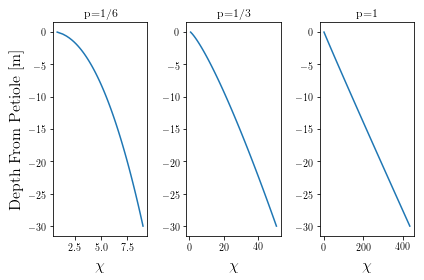

In [26]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import conda
import math

def XylemTaper(z,p):

    # Constants
    
    lp  = 0.04
    nbb = 2.0     # num branches per branch

    # nb  = number of branch layers
    
    
    # Taper parameters for taper levels:
    # p < 1/6           (no taper)
    # 1/6 <= p < 1/3
    # 1/3 <= p < 1
    # 1 <= p

    
    a_pr = [1.0, 0.9144, 0.9263, 2.5352]
    
    b_pr = [0.0, 0.3020, 0.5287, 0.6797]
    
    
    
    # Choose the taper parameters based on the
    # p_taper level
    
    if(p < (1./6.)):
        ip = 0
    elif( (p>=1./6.) and (p<1./3.)  ):
        ip = 1
    elif( (p>=1./3.) and (p<1.)  ):
        ip = 2
    else:
        ip = 3
        
    
    nb  = (3.0*math.log(1.0 - (z/lp) * (1.0-nbb**(1.0/3.0))))/math.log(nbb) - 1.0
    
    
    R_x = nbb**(nb/2.0)
    
    
    chi_taper = a_pr[ip] * R_x**(b_pr[ip])
    
    
    return(chi_taper)
    
    
    
    
# Main Program
# -------------------------------------------------------




z_depth = np.linspace(0,30,100)



chi  = np.zeros(len(z_depth))


# Walk through the depth of the tree and calculate
# the chi function

fig, ((ax1, ax2, ax3)) = plt.subplots(ncols=3)
plt.rc('text', usetex=True)


p_taper = 1.01/6.0
ax1.set_title('p=1/6')
ax1.set_xlabel(r"$\chi$",fontsize=16)
ax1.set_ylabel('Depth From Petiole [m]',fontsize=16)
for i,z in enumerate(z_depth):
    chi[i]  = XylemTaper(z,p_taper)
ax1.plot(chi[:],-z_depth)

      
p_taper = 1.01/3.0
ax2.set_title('p=1/3')
ax2.set_xlabel(r"$\chi$",fontsize=16)
for i,z in enumerate(z_depth):
    chi[i]  = XylemTaper(z,p_taper)
ax2.plot(chi[:],-z_depth)


p_taper = 1.01
ax3.set_title('p=1')
ax3.set_xlabel(r"$\chi$",fontsize=16)
for i,z in enumerate(z_depth):
    chi[i]  = XylemTaper(z,p_taper)
ax3.plot(chi[:],-z_depth,label=lab)

plt.tight_layout()



Savage VM, Bentley LP, Enquist BJ, Sperry JS, Smith DD, Reich PB, von Allmen EI. 2010. Hydraulic trade-offs and space filling enable better predictions of vascular structure and function in plants. Proceedings of the National Academy of Sciences 107(52): 22722-22727.